## Final Project Submission

Please fill out:
* Student name: Cassie Nutter
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


Import necessary tools for project here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

Load data files here

In [2]:
title_basics_df = pd.read_csv ('zippedData/imdb.title.basics.csv.gz')
title_ratings_df = pd.read_csv ('zippedData/imdb.title.ratings.csv.gz')
movie_gross_df = pd.read_csv ('zippedData/bom.movie_gross.csv.gz')
movie_budgets_df = pd.read_csv ('zippedData/tn.movie_budgets.csv.gz')

In [3]:
print (title_basics_df.info())
title_basics_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
print (title_ratings_df.info())
title_ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
print(movie_gross_df.info())
movie_gross_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
print (movie_budgets_df.info())
movie_budgets_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Find most popular month to release a movie

In [7]:
movie_budgets_df ['release_month'] = movie_budgets_df['release_date'].map(lambda x: x [:3])

In [8]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Dec


In [9]:
# old lamdba to get month 
# movie_budgets_df ['release_month'] = movie_budgets_df['release_date'].map(lambda x: x [:3])

movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
movie_budgets_df ['release_m'] = movie_budgets_df['release_date'].dt.month
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_m
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Dec,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May,5
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Jun,6
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Dec,12


<AxesSubplot:xlabel='release_m', ylabel='count'>

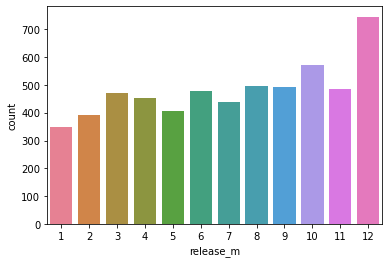

In [10]:
sns.countplot(x='release_m', data= movie_budgets_df, palette='husl')

December looks like the most popular month to release a movie, followed by October.

January is the least popular month for movie releases.

...But does that mean these movies make money? Or is that just a time when people decide to release them?

### See how much movies make based on release month

First, turn strings to integers and remove '$' and ','

In [11]:
movie_budgets_df['domestic_gross'] = [x.strip('$') for x in movie_budgets_df['domestic_gross']]
movie_budgets_df['domestic_gross'] = movie_budgets_df ['domestic_gross'].str.replace(',', '')

movie_budgets_df['production_budget'] = [x.strip('$') for x in movie_budgets_df['production_budget']]
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace(',', '')

movie_budgets_df['worldwide_gross'] = [x.strip ('$') for x in movie_budgets_df['worldwide_gross']]
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace(',', '')

In [12]:
#Check that it worked!
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_m
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,Dec,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,Jun,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,May,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec,12


In [13]:
#Turn the strings into integers
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].astype(int)
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].astype(int)
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].astype(int)

In [14]:
#Did it work?
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   release_month      5782 non-null   object        
 7   release_m          5782 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 361.5+ KB


### Great! So let's plot it!

/Users/cassienutter/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


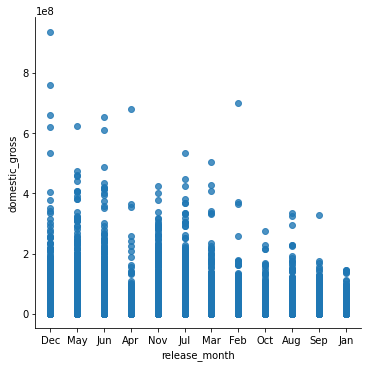

In [15]:
sns.lmplot( 'release_month', 'domestic_gross', data=movie_budgets_df, fit_reg=False)

In [16]:
dom_gross_df = movie_budgets_df.sort_values (by= 'domestic_gross', ascending= False).reset_index()

In [17]:
dom_gross_df.head(10)

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_m
0,5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Dec,12
1,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,Dec,12
2,41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,Feb,2
3,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Apr,4
4,42,43,1997-12-19,Titanic,200000000,659363944,2208208395,Dec,12
5,33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,Jun,6
6,26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,May,5
7,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec,12
8,43,44,2018-06-15,Incredibles 2,200000000,608581744,1242520711,Jun,6
9,74,75,2008-07-18,The Dark Knight,185000000,533720947,1001996207,Jul,7


Using the graph, we can see that movies that are released in December do well in the box office (domestically). Out of the top 10 movies that made the most, 4 were released in December.

But what about worldwide? Does December prove a good month for that too?

/Users/cassienutter/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


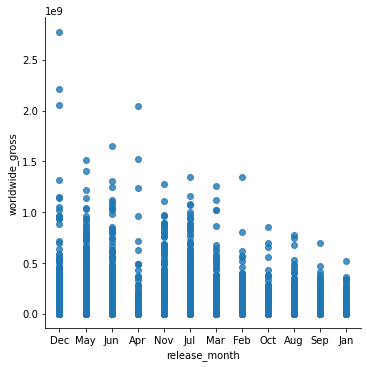

In [18]:
sns.lmplot ('release_month', 'worldwide_gross', data = movie_budgets_df, fit_reg = False)

In [19]:
world_gross_df = movie_budgets_df.sort_values(by= 'worldwide_gross', ascending= False).reset_index()

In [20]:
world_gross_df.head(10)

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_m
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,Dec,12
1,42,43,1997-12-19,Titanic,200000000,659363944,2208208395,Dec,12
2,5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Dec,12
3,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Apr,4
4,33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,Jun,6
5,66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,Apr,4
6,26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,May,5
7,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,May,5
8,41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,Feb,2
9,260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,Jul,7


The top 3 highest grossing movies worldwide were all released in December!

### Conclusion: December is a good time to release a movie
Also, the top movies that were released in December were released mid-December. If releasing in December, choose a day in the middle of the month.

In [21]:
#get day out of December month and graph based on day in December for highest worldwide gross
movie_budgets_df ['release_d'] = movie_budgets_df['release_date'].dt.day
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   release_month      5782 non-null   object        
 7   release_m          5782 non-null   int64         
 8   release_d          5782 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 406.7+ KB


In [22]:
# dec_days = []
# def get_dec_day (df, col1, col2):
#     for month in col1:
#         if month == 12:
#             dec_days.append(col2)
#             return dec_days
        
# movie_budgets_df['d_days'] = 

## Explore other datasets

In [23]:
title_basics_df.isna().any()
title_basics_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Going to drop the runtime_minutes column. Not going to do an analysis with it and it has such a large amount of missing data. Don't want to delete all of entries because there is still some good information there.

In [24]:
new_title_basics_df = title_basics_df.drop(columns = 'runtime_minutes', axis = 1)

In [25]:
new_title_basics_df.isna().sum() / len (new_title_basics_df)

tconst            0.000000
primary_title     0.000000
original_title    0.000144
start_year        0.000000
genres            0.037005
dtype: float64

I'd really like to do some analysis in genres. It looks like I can stand to lose 3.7% of data and a very small amount due to the 'original_title' missing. I'll go ahead and drop all that.

In [26]:
new_title_basics_df.dropna (axis = 0, inplace=True)

In [27]:
#did it work? YEP!
new_title_basics_df.isna().sum()

tconst            0
primary_title     0
original_title    0
start_year        0
genres            0
dtype: int64

In [28]:
#And we still have plenty of data to work with
len (new_title_basics_df) 

140734

Going to join another file and then see the other missing values that are present.

In [29]:
titles_together_df = pd.merge(new_title_basics_df, title_ratings_df, how = 'left', left_on = 'tconst', right_on = 'tconst')

In [30]:
# len (titles_together_df)
# titles_together_df.head()
titles_together_df.isna().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
genres                0
averagerating     67682
numvotes          67682
dtype: int64

In [31]:
titles_together_df.isna().sum() / len (titles_together_df)

tconst            0.000000
primary_title     0.000000
original_title    0.000000
start_year        0.000000
genres            0.000000
averagerating     0.480921
numvotes          0.480921
dtype: float64

WHOA! Almost 50% of our data is null for 'averagerating' and 'numvotes'!

We are going to merge in a much smaller DataFrame, so there is a good chance a lot of those will fall off.

In [32]:
#Merge movie_gross_df to the titles df to be able to analyze studios, ratings, money made, and genres
titles_and_gross_df = pd.merge(movie_gross_df, titles_together_df, how = 'inner', left_on= 'title', right_on= 'primary_title')


In [33]:
len (titles_and_gross_df)

3326

In [34]:
titles_and_gross_df.isna().sum() / len (titles_and_gross_df)

title             0.000000
studio            0.000902
domestic_gross    0.007216
foreign_gross     0.393867
year              0.000000
tconst            0.000000
primary_title     0.000000
original_title    0.000000
start_year        0.000000
genres            0.000000
averagerating     0.092002
numvotes          0.092002
dtype: float64

Let's get rid of those pesky NaN values!
But I don't want to lose over a third of my data, so I'm going to drop the foreign_gross column 
and just look at domestic_gross. 
Then I'll drop the NaN values.

In [35]:
titles_and_gross_df = titles_and_gross_df.drop (['foreign_gross', 'primary_title', 'original_title', 'tconst'], axis = 1)


In [36]:
titles_and_gross_df.dropna(axis= 0, inplace= True)

In [37]:
titles_and_gross_df.isna().sum()
len (titles_and_gross_df)

2997

In [38]:
titles_and_gross_df.head()

,title,studio,domestic_gross,year,start_year,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,2010,2010,"Adventure,Animation,Comedy",8.3,682218.0
1,Inception,WB,292600000.0,2010,2010,"Action,Adventure,Sci-Fi",8.8,1841066.0
2,Shrek Forever After,P/DW,238700000.0,2010,2010,"Adventure,Animation,Comedy",6.3,167532.0
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,2010,"Adventure,Drama,Fantasy",5.0,211733.0
4,Iron Man 2,Par.,312400000.0,2010,2010,"Action,Adventure,Sci-Fi",7.0,657690.0


In [39]:
titles_and_gross_df.sort_values (by= ['domestic_gross'], ascending= False, inplace= True)

In [40]:
titles_and_gross_df= titles_and_gross_df.reset_index()

In [41]:
#I can see some duplicates!!
#Wonder Woman is listed 3 times
# Let's check for other duplicates
titles_and_gross_df.head(15)

,index,title,studio,domestic_gross,year,start_year,genres,averagerating,numvotes
0,3024,Black Panther,BV,700100000.0,2018,2018,"Action,Adventure,Sci-Fi",7.3,516148.0
1,3023,Avengers: Infinity War,BV,678800000.0,2018,2018,"Action,Adventure,Sci-Fi",8.5,670926.0
2,1780,Jurassic World,Uni.,652300000.0,2015,2015,"Action,Adventure,Sci-Fi",7.0,539338.0
3,2674,Star Wars: The Last Jedi,BV,620200000.0,2017,2017,"Action,Adventure,Fantasy",7.1,462903.0
4,3026,Incredibles 2,BV,608600000.0,2018,2018,"Action,Adventure,Animation",7.7,203510.0
5,2238,Rogue One: A Star Wars Story,BV,532200000.0,2016,2016,"Action,Adventure,Sci-Fi",7.8,478592.0
6,2239,Finding Dory,BV,486300000.0,2016,2016,"Adventure,Animation,Comedy",7.3,213542.0
7,1782,Avengers: Age of Ultron,BV,459000000.0,2015,2015,"Action,Adventure,Sci-Fi",7.3,665594.0
8,655,The Dark Knight Rises,WB,448100000.0,2012,2012,"Action,Thriller",8.4,1387769.0
9,1064,The Hunger Games: Catching Fire,LGF,424700000.0,2013,2013,"Action,Adventure,Sci-Fi",7.5,575455.0


In [42]:
dup_df = titles_and_gross_df.duplicated(subset = 'title')

In [43]:
#Yeesh! 417 duplicates! 
dup_df.sum()

417

In [44]:
#How about we drop those guys!
titles_and_gross_df.drop_duplicates(subset = 'title', inplace = True)

In [45]:
titles_and_gross_df = titles_and_gross_df.reset_index()

In [46]:
len (titles_and_gross_df)

2580

In [47]:
titles_and_gross_df.head(15)

,level_0,index,title,studio,domestic_gross,year,start_year,genres,averagerating,numvotes
0,0,3024,Black Panther,BV,700100000.0,2018,2018,"Action,Adventure,Sci-Fi",7.3,516148.0
1,1,3023,Avengers: Infinity War,BV,678800000.0,2018,2018,"Action,Adventure,Sci-Fi",8.5,670926.0
2,2,1780,Jurassic World,Uni.,652300000.0,2015,2015,"Action,Adventure,Sci-Fi",7.0,539338.0
3,3,2674,Star Wars: The Last Jedi,BV,620200000.0,2017,2017,"Action,Adventure,Fantasy",7.1,462903.0
4,4,3026,Incredibles 2,BV,608600000.0,2018,2018,"Action,Adventure,Animation",7.7,203510.0
5,5,2238,Rogue One: A Star Wars Story,BV,532200000.0,2016,2016,"Action,Adventure,Sci-Fi",7.8,478592.0
6,6,2239,Finding Dory,BV,486300000.0,2016,2016,"Adventure,Animation,Comedy",7.3,213542.0
7,7,1782,Avengers: Age of Ultron,BV,459000000.0,2015,2015,"Action,Adventure,Sci-Fi",7.3,665594.0
8,8,655,The Dark Knight Rises,WB,448100000.0,2012,2012,"Action,Thriller",8.4,1387769.0
9,9,1064,The Hunger Games: Catching Fire,LGF,424700000.0,2013,2013,"Action,Adventure,Sci-Fi",7.5,575455.0


Finally!

Duplicates are gone, as are NaN values. 
Let's get to work!

[Text(0.5, 0, 'Average Rating'), Text(0, 0.5, 'Top 15 Highest Grossing Films')]

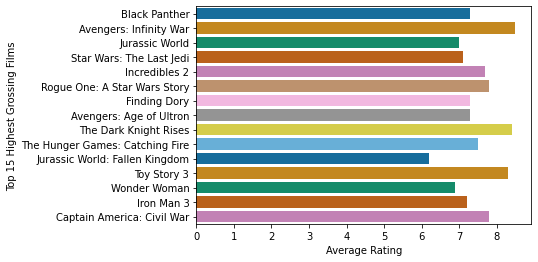

In [48]:
rating_gross_img = sns.barplot(x= 'averagerating', y= 'title', data= titles_and_gross_df[:15], palette= 'colorblind')
rating_gross_img.set (xlabel = 'Average Rating', ylabel = 'Top 15 Highest Grossing Films')

Whoa! Even though Jurassic World: Fallen Kingdom did well in the box office, the audience members that reviewed it did not like it.

Now let's take a look at the studios that make these movies:

In [49]:
top_fifteen_df = titles_and_gross_df[:15]

In [50]:
top_studios_df = top_fifteen_df.value_counts(subset= 'studio')

In [51]:
top_studios_df

studio
BV      10
WB       2
Uni.     2
LGF      1
dtype: int64

[Text(0.5, 0, 'Studio'), Text(0, 0.5, '# of Top 15 Movies')]

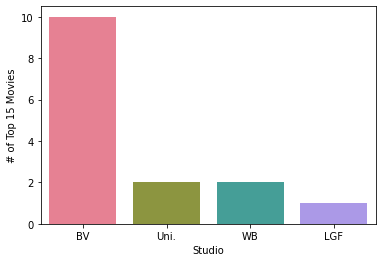

In [52]:
count_studio_img = sns.countplot (x = 'studio', data= top_fifteen_df, palette='husl')
count_studio_img.set (xlabel= 'Studio', ylabel= '# of Top 15 Movies')

WHOA! It looks like if you want a hit, better look to see what "BV"(AKA Disney), is doing. They have made ten out of the top fifteen highest grossing movies!